# Porter Delivery Time Analysis

Use the "Run" button to execute the code.

In [196]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats import shapiro
from scipy import stats
import statsmodels.api as sm

In [108]:
df=pd.read_csv('dataset[1].csv')

In [109]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


In [110]:
df.shape

(197428, 14)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

In [112]:
df.describe()

,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
count,196441.000000,196433.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000
mean,2.978706,2.882352,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.808093,41.739747,58.050065
std,1.524867,1.503771,2.666546,1823.093688,1.630255,522.038648,558.411377,34.526783,32.145733,52.661830
min,1.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000
25%,2.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000
50%,3.000000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000
75%,4.000000,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000
max,6.000000,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000


#### Creation of column Delivery Time

In [115]:
df['created_at'] = pd.to_datetime(df['created_at'])

In [116]:
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])

In [117]:
df['Delivery Time'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60
df['Delivery Time']

0         62.983333
1         67.066667
2         29.683333
3         51.250000
4         39.833333
            ...    
197423    65.116667
197424    56.383333
197425    50.133333
197426    65.116667
197427    37.133333
Name: Delivery Time, Length: 197428, dtype: float64

#### Relationship between dependent and independent variable

In [118]:
## Finding Numerical features

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 196441 non-null  float64       
 1   created_at                197428 non-null  datetime64[ns]
 2   actual_delivery_time      197421 non-null  datetime64[ns]
 3   store_id                  197428 non-null  object        
 4   store_primary_category    192668 non-null  object        
 5   order_protocol            196433 non-null  float64       
 6   total_items               197428 non-null  int64         
 7   subtotal                  197428 non-null  int64         
 8   num_distinct_items        197428 non-null  int64         
 9   min_item_price            197428 non-null  int64         
 10  max_item_price            197428 non-null  int64         
 11  total_onshift_partners    181166 non-null  float64       
 12  to

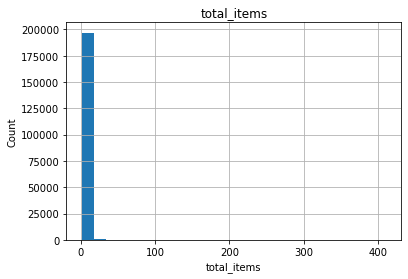

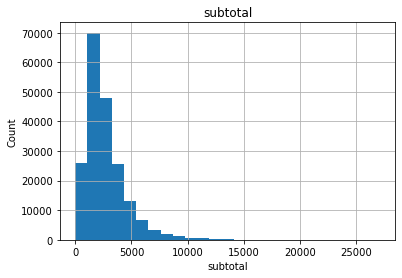

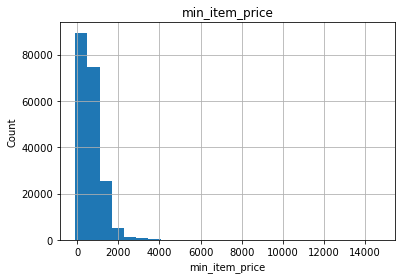

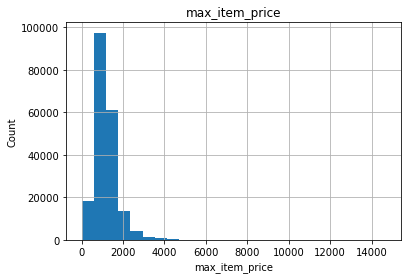

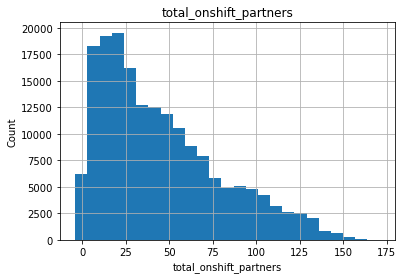

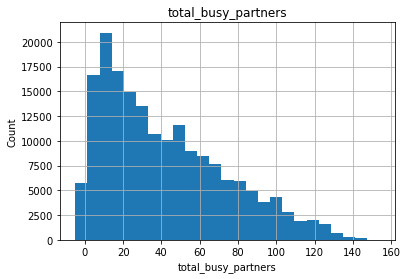

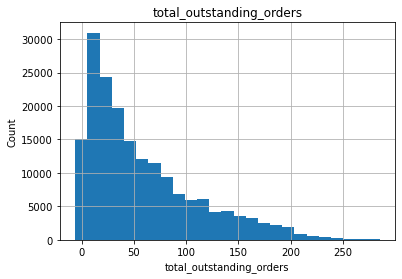

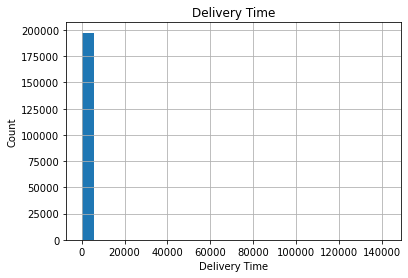

In [120]:
continuous_features = ['total_items','subtotal','min_item_price','max_item_price','total_onshift_partners','total_busy_partners','total_outstanding_orders','Delivery Time']

for feature in continuous_features:
    data1=df.copy()
    data1[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

### Finding and removing Duplicate observation

In [124]:
df[df.duplicated()]

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,Delivery Time


There is no repeat observation or record in dataset available.

#### Removing null values

In [125]:
df.isnull().sum()

market_id                     987
created_at                      0
actual_delivery_time            7
store_id                        0
store_primary_category       4760
order_protocol                995
total_items                     0
subtotal                        0
num_distinct_items              0
min_item_price                  0
max_item_price                  0
total_onshift_partners      16262
total_busy_partners         16262
total_outstanding_orders    16262
Delivery Time                   7
dtype: int64

In [126]:
df.drop({'created_at','actual_delivery_time'},axis=1,inplace=True)

In [127]:
df.head()

,market_id,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,Delivery Time
0,1.0,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,62.983333
1,2.0,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,67.066667
2,3.0,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,29.683333
3,3.0,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,51.250000
4,3.0,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,39.833333


In [128]:
df.isnull().sum()

market_id                     987
store_id                        0
store_primary_category       4760
order_protocol                995
total_items                     0
subtotal                        0
num_distinct_items              0
min_item_price                  0
max_item_price                  0
total_onshift_partners      16262
total_busy_partners         16262
total_outstanding_orders    16262
Delivery Time                   7
dtype: int64

In [129]:
## As there are so many missing values need to  hanle it , first check the relationship of indepenent varible with dependent variable

In [130]:
features_with_na=[features for features in df.columns if df[features].isnull().sum() > 1]
features_with_na

['market_id',
 'store_primary_category',
 'order_protocol',
 'total_onshift_partners',
 'total_busy_partners',
 'total_outstanding_orders',
 'Delivery Time']

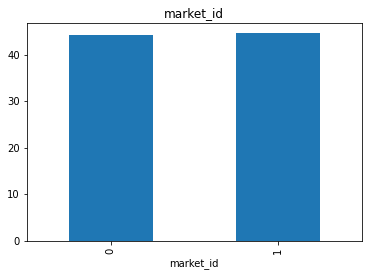

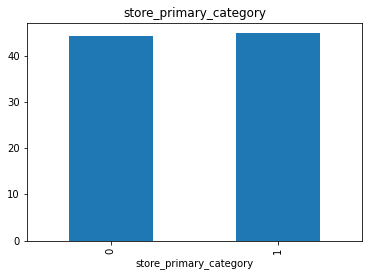

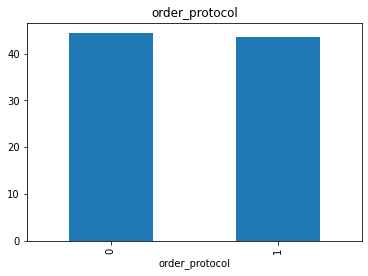

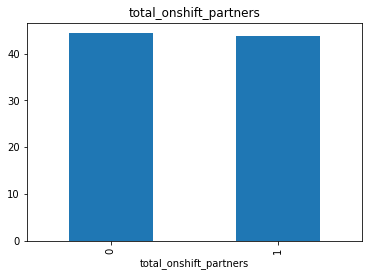

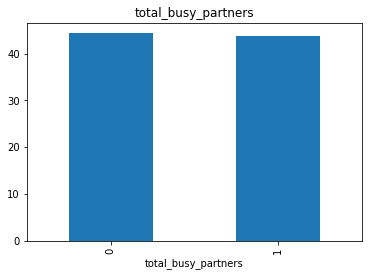

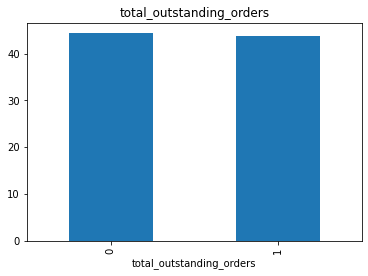

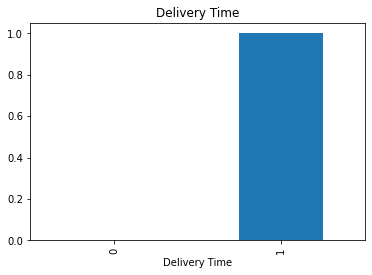

In [131]:
for feature in features_with_na:
    data=df.copy()

    data[feature]=np.where(data[feature].isnull(),1,0)
    
    data.groupby(feature)['Delivery Time'].median().plot.bar()
    plt.title(feature)
    plt.show()

In [132]:
df.isnull().sum()

market_id                     987
store_id                        0
store_primary_category       4760
order_protocol                995
total_items                     0
subtotal                        0
num_distinct_items              0
min_item_price                  0
max_item_price                  0
total_onshift_partners      16262
total_busy_partners         16262
total_outstanding_orders    16262
Delivery Time                   7
dtype: int64

As total number is  in market_id and order_protocol is very less drop that observation

In [134]:
df.dropna(subset=['market_id','order_protocol'],inplace=True)

In [135]:
df.isnull().sum()

market_id                       0
store_id                        0
store_primary_category       4005
order_protocol                  0
total_items                     0
subtotal                        0
num_distinct_items              0
min_item_price                  0
max_item_price                  0
total_onshift_partners      16150
total_busy_partners         16150
total_outstanding_orders    16150
Delivery Time                   7
dtype: int64

In [142]:
df.dropna(subset=['store_primary_category'],inplace=True)

In [143]:
df.isnull().sum()

market_id                       0
store_id                        0
store_primary_category          0
order_protocol                  0
total_items                     0
subtotal                        0
num_distinct_items              0
min_item_price                  0
max_item_price                  0
total_onshift_partners      15673
total_busy_partners         15673
total_outstanding_orders    15673
Delivery Time                   7
dtype: int64

In [144]:
### Now replacing null values in columns with mean
df[df['total_busy_partners'].isna()]

,market_id,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,Delivery Time
160,6.0,45d38ce7f5231602e24a2103a0300ae6,breakfast,2.0,2,575,2,225,350,NaN,NaN,NaN,30.916667
161,6.0,45d38ce7f5231602e24a2103a0300ae6,breakfast,2.0,5,1415,3,185,675,NaN,NaN,NaN,69.833333
162,6.0,45d38ce7f5231602e24a2103a0300ae6,breakfast,2.0,1,650,1,650,650,NaN,NaN,NaN,57.033333
163,6.0,45d38ce7f5231602e24a2103a0300ae6,breakfast,2.0,5,1550,5,225,700,NaN,NaN,NaN,123.200000
164,6.0,45d38ce7f5231602e24a2103a0300ae6,breakfast,2.0,6,1110,5,185,185,NaN,NaN,NaN,56.133333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
197196,3.0,084afd913ab1e6ea58b8ca73f6cb41a6,indian,2.0,3,1792,3,163,1177,NaN,NaN,NaN,37.733333
197197,3.0,084afd913ab1e6ea58b8ca73f6cb41a6,indian,2.0,8,2923,5,50,1199,NaN,NaN,NaN,52.633333
197198,3.0,084afd913ab1e6ea58b8ca73f6cb41a6,indian,2.0,3,3297,3,799,1299,NaN,NaN,NaN,45.350000
197199,3.0,084afd913ab1e6ea58b8ca73f6cb41a6,indian,2.0,4,2776,4,179,1099,NaN,NaN,NaN,48.633333


In [145]:
df['total_busy_partners']=df['total_busy_partners'].fillna(df['total_busy_partners'].mean())

In [146]:
df.isnull().sum()

market_id                       0
store_id                        0
store_primary_category          0
order_protocol                  0
total_items                     0
subtotal                        0
num_distinct_items              0
min_item_price                  0
max_item_price                  0
total_onshift_partners      15673
total_busy_partners             0
total_outstanding_orders    15673
Delivery Time                   7
dtype: int64

In [147]:
len(df['total_busy_partners'].unique())

159

In [148]:
df['total_onshift_partners']=df['total_onshift_partners'].fillna(df['total_onshift_partners'].mean())

In [149]:
df['total_outstanding_orders']=df['total_outstanding_orders'].fillna(df['total_outstanding_orders'].mean())
df.isnull().sum()

market_id                   0
store_id                    0
store_primary_category      0
order_protocol              0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_partners      0
total_busy_partners         0
total_outstanding_orders    0
Delivery Time               7
dtype: int64

In [150]:
df.dropna(subset=['Delivery Time'],inplace=True)

In [151]:
df.isnull().sum()

market_id                   0
store_id                    0
store_primary_category      0
order_protocol              0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_partners      0
total_busy_partners         0
total_outstanding_orders    0
Delivery Time               0
dtype: int64

#### Managing Outliers in dataset

In [152]:
continuous_features

['total_items',
 'subtotal',
 'min_item_price',
 'max_item_price',
 'total_onshift_partners',
 'total_busy_partners',
 'total_outstanding_orders',
 'Delivery Time']

##### Categorical Features

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191921 entries, 0 to 197427
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 191921 non-null  float64
 1   store_id                  191921 non-null  object 
 2   store_primary_category    191921 non-null  object 
 3   order_protocol            191921 non-null  float64
 4   total_items               191921 non-null  int64  
 5   subtotal                  191921 non-null  int64  
 6   num_distinct_items        191921 non-null  int64  
 7   min_item_price            191921 non-null  int64  
 8   max_item_price            191921 non-null  int64  
 9   total_onshift_partners    191921 non-null  float64
 10  total_busy_partners       191921 non-null  float64
 11  total_outstanding_orders  191921 non-null  float64
 12  Delivery Time             191921 non-null  float64
dtypes: float64(6), int64(5), object(2)
memory us

In [154]:
Categorical_features = [feature for feature in df.columns if df[feature].dtypes=='O']
Categorical_features

['store_id', 'store_primary_category']

In [155]:
len(df['store_id'].unique())

6567

In [156]:
### Drop Column store_id

df.drop('store_id',axis=1,inplace=True)

In [157]:
len(df['store_primary_category'].unique())

74

In [158]:
df.drop('store_primary_category',axis=1,inplace=True)

### Handling Numerical Variable

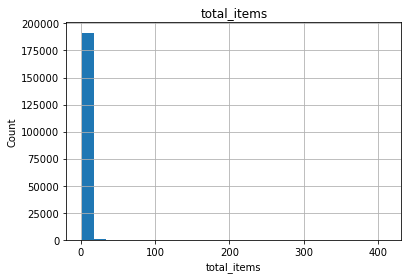

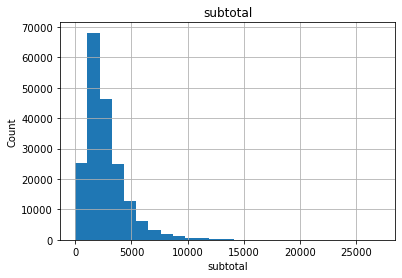

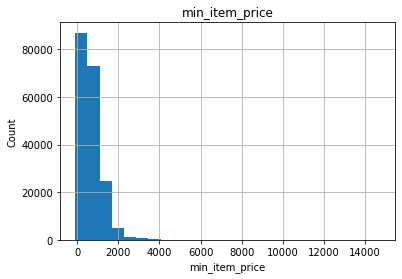

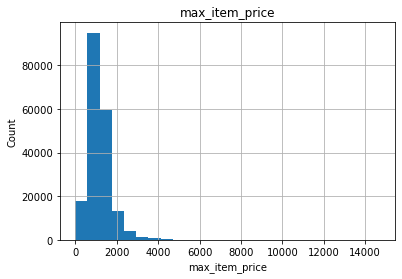

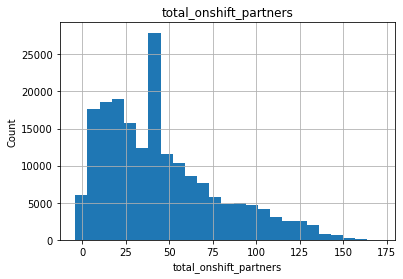

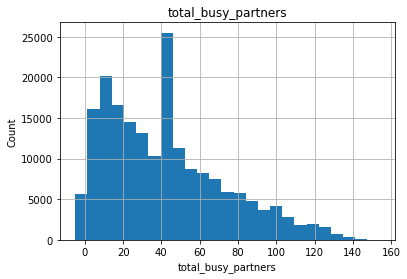

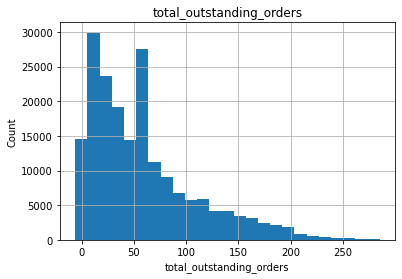

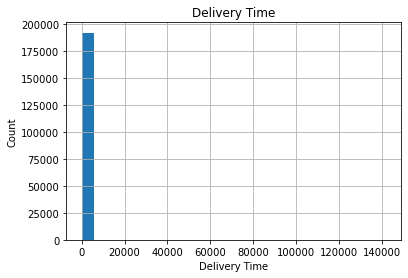

In [159]:
continuous_features = ['total_items','subtotal','min_item_price','max_item_price','total_onshift_partners','total_busy_partners','total_outstanding_orders','Delivery Time']

for feature in continuous_features:
    data1=df.copy()
    data1[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

In [160]:
skew(df[{'total_items','subtotal','min_item_price','max_item_price','total_onshift_partners','total_busy_partners','total_outstanding_orders'}])

array([ 1.96501812,  2.31794313,  1.24350356,  0.89414277, 21.87126084,
        0.81274589,  2.20075262])

In [161]:
for col in continuous_features:
    skewness= skew(data1[col])
    print(col, skewness)

total_items 21.871260837093505
subtotal 1.9650181226458758
min_item_price 2.3179431346114385
max_item_price 2.2007526212328803
total_onshift_partners 0.8941427746782831
total_busy_partners 0.8127458902008776
total_outstanding_orders 1.2435035566621122
Delivery Time 433.5948291572381


As there are columns like total_items, subtotal , min_item_price,max_item_price,total_outstanding_orders are having skewd data so it is going to be normalized after removing outliers from data

### Removing outliers

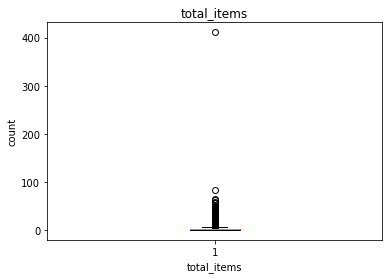

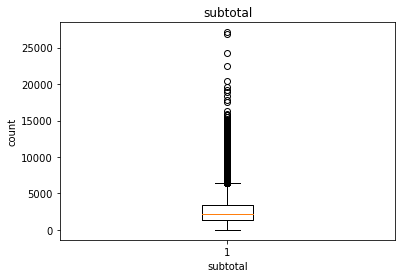

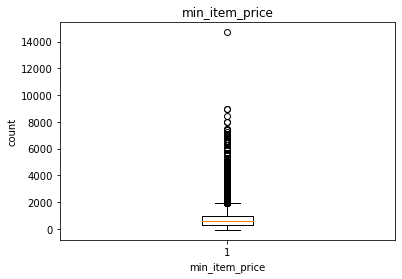

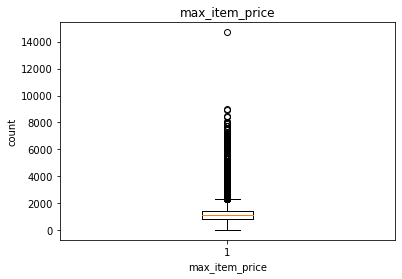

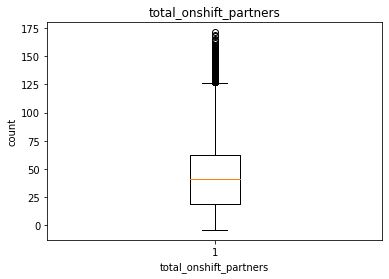

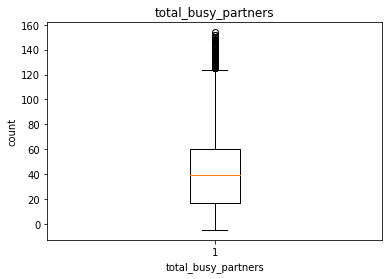

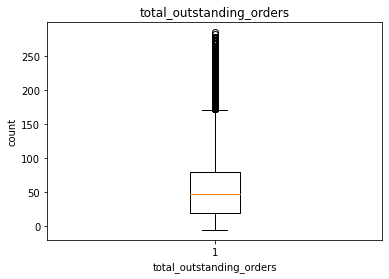

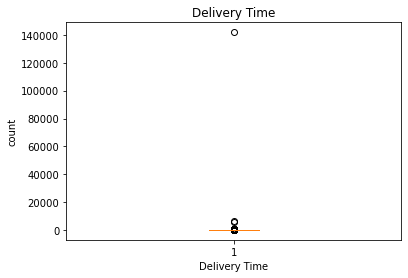

In [162]:
for feature in continuous_features:
    plt.boxplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.title(feature)
    plt.show()

In [163]:
Q1 = df['total_items'].quantile(0.25)
Q3 = df['total_items'].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
print(upper_limit)

7.0


In [164]:
df=df[df['total_items'] <= 7]

In [165]:
Q1 = df['subtotal'].quantile(0.25)
Q3 = df['subtotal'].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 +  IQR
print(upper_limit)

5063.0


In [166]:
df = df[(df['subtotal']<=5063.0 )]

<AxesSubplot:ylabel='subtotal'>

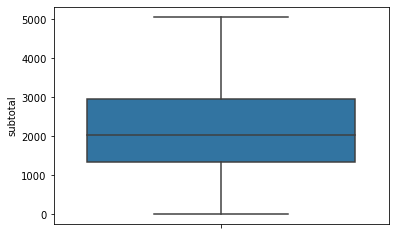

In [167]:
sns.boxplot(y='subtotal',data=df)

In [168]:
Q1 = df['min_item_price'].quantile(0.25)
Q3 = df['min_item_price'].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 +  IQR
print(upper_limit)

1600.0


In [169]:
df=df[df['min_item_price'] <= 1600]

<AxesSubplot:ylabel='min_item_price'>

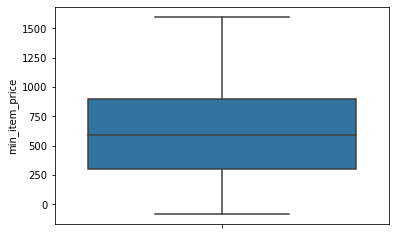

In [170]:
sns.boxplot(y='min_item_price',data=df)

In [171]:
Q1 = df['max_item_price'].quantile(0.25)
Q3 = df['max_item_price'].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 +  IQR
print(upper_limit)

1795.0


In [172]:
df=df[df['max_item_price'] <= 1795.0]

<AxesSubplot:ylabel='max_item_price'>

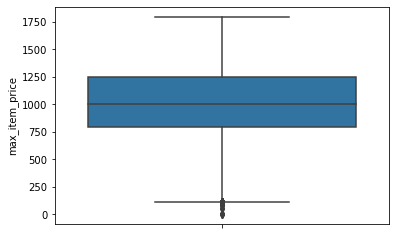

In [173]:
sns.boxplot(y='max_item_price',data=df)

In [174]:
Q1 = df['total_onshift_partners'].quantile(0.25)
Q3 = df['total_onshift_partners'].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5* IQR
print(upper_limit)

123.0


In [175]:
df=df[df['total_outstanding_orders'] <= 123.0]

<AxesSubplot:ylabel='total_outstanding_orders'>

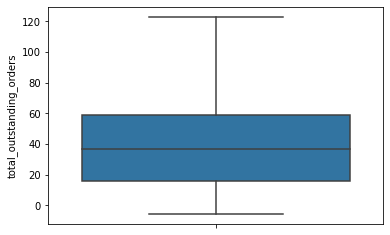

In [176]:
sns.boxplot(y='total_outstanding_orders',data=df)

In [177]:
Q1 = df['total_busy_partners'].quantile(0.25)
Q3 = df['total_busy_partners'].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
print(upper_limit)

96.5


In [178]:
df=df[df['total_outstanding_orders'] <= 121.0]

<AxesSubplot:ylabel='total_outstanding_orders'>

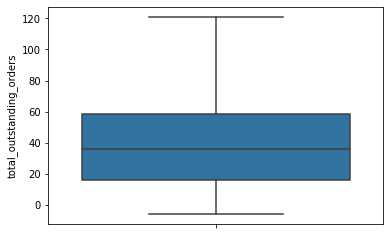

In [179]:
sns.boxplot(y='total_outstanding_orders',data=df)

In [180]:
Q1 = df['total_outstanding_orders'].quantile(0.25)
Q3 = df['total_outstanding_orders'].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5* IQR
print(upper_limit)

121.52236815976852


In [181]:
df=df[df['total_outstanding_orders'] <= 163.0]

<AxesSubplot:ylabel='total_outstanding_orders'>

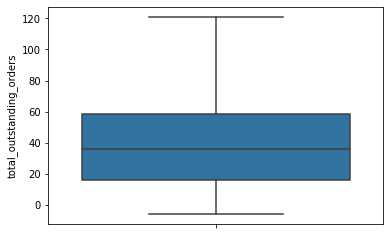

In [182]:
sns.boxplot(y='total_outstanding_orders',data=df)

In [183]:
Q1 = df['Delivery Time'].quantile(0.25)
Q3 = df['Delivery Time'].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 +  IQR
print(upper_limit)

73.15


In [184]:
df=df[(df['Delivery Time'] <= 73.15) & (df['Delivery Time'] > 7)]

<AxesSubplot:ylabel='Delivery Time'>

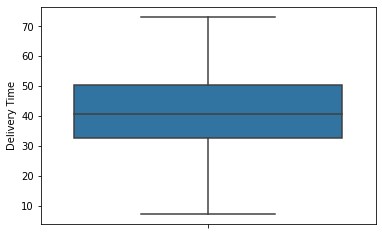

In [185]:
sns.boxplot(y='Delivery Time',data=df)

All the outliers have been removed

In [186]:
## Now check for skewness agvain

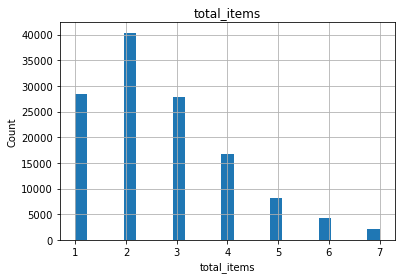

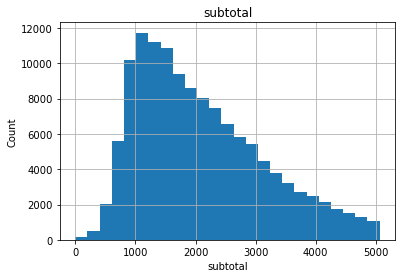

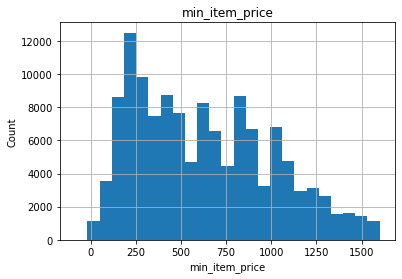

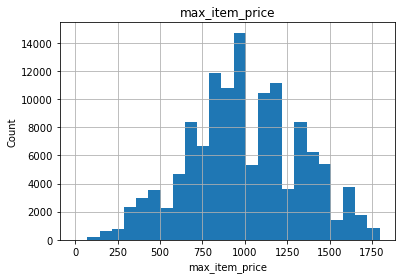

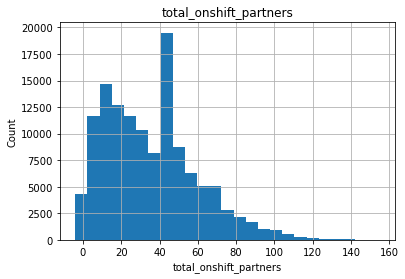

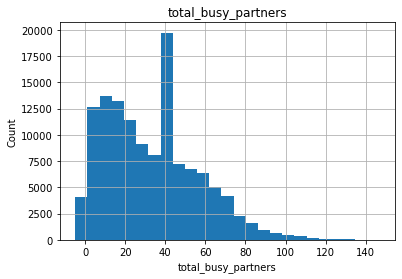

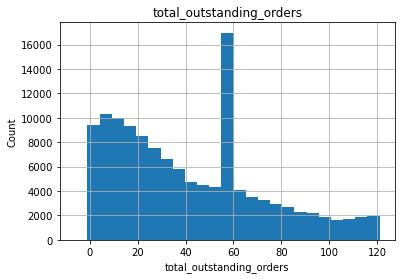

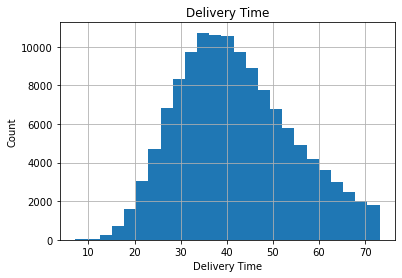

In [187]:
continuous_features = ['total_items','subtotal','min_item_price','max_item_price','total_onshift_partners','total_busy_partners','total_outstanding_orders','Delivery Time']

for feature in continuous_features:
    data1=df.copy()
    data1[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

In [188]:
for col in continuous_features:
    skewness= skew(data1[col])
    print(col, skewness)

total_items 0.8914091865246323
subtotal 0.7183589718092218
min_item_price 0.48320482989260016
max_item_price -0.018899225486960675
total_onshift_partners 0.7570630226447412
total_busy_partners 0.6939813079545394
total_outstanding_orders 0.617508031435429
Delivery Time 0.35143446643456394


Observation As seen there is  no skewness in data after removing outliers.

In [189]:
df

,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,Delivery Time
0,1.0,1.0,4,3441,4,557,1239,33.0,14.0,21.0,62.983333
1,2.0,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,67.066667
8,2.0,3.0,4,4771,3,820,1604,8.0,6.0,18.0,26.433333
14,1.0,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,37.883333
18,1.0,1.0,2,3150,2,1425,1725,4.0,9.0,12.0,71.600000
...,...,...,...,...,...,...,...,...,...,...,...
197423,1.0,4.0,3,1389,3,345,649,17.0,17.0,23.0,65.116667
197424,1.0,4.0,6,3010,4,405,825,12.0,11.0,14.0,56.383333
197425,1.0,4.0,5,1836,3,300,399,39.0,41.0,40.0,50.133333
197426,1.0,1.0,1,1175,1,535,535,7.0,7.0,12.0,65.116667


In [219]:
## Business Question

### Build the model to find estimate time for delivery considering related factors

### hypothesis 1 
### Null Hypothesis H0: There is no significant relationship between Delivery time and total_items
#### H1: There is  significant relationship between Delivery time and total_items


### Hypothesis 2
### Null Hypothesis H0: There is no significant relationship between Delivery time and total_busy_partners
#### H1: There is  significant relationship between Delivery time and total_outstanding_partners

#### Business Question:
Determining which factor will affect the delivery time.

#### Hypothesis 1
H0: There is no significant relation between Delivery Time and total_items


H1: There is significant relationship between Delivery Time and total_items

#### Hypothesis 2
H0: There is no significant relationship between Delivery time and total_busy_partners

H1: There is  significant relationship between Delivery time and total_busy_partners

#### Correlation Test

In [216]:
r,p =stats.pearsonr(df['Delivery Time'], df['total_items'])
print(round(r,4))
print(round(p,4))

0.1103
0.0


In [217]:
r,p =stats.pearsonr(df['Delivery Time'], df['total_busy_partners'])
print(round(r,4))
print(round(p,4))

0.0062
0.0264


### Linear Regression

### For Hypothesis 1

In [197]:
y = df['Delivery Time']
x = df['total_items']

In [198]:
x = sm.add_constant(x)

In [199]:
model = sm.OLS(y, x)

In [200]:
results = model.fit()

In [201]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          Delivery Time   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     1577.
Date:                Sat, 29 Apr 2023   Prob (F-statistic):               0.00
Time:                        09:45:45   Log-Likelihood:            -5.0446e+05
No. Observations:              128142   AIC:                         1.009e+06
Df Residuals:                  128140   BIC:                         1.009e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          39.4260      0.073    538.210      

### Observation: 
As p value is less than 0.05 so as number of item increases it might lead to increase in delivery time

### For Hypothesis 2

In [208]:
a = df['total_busy_partners']
b = df['total_items']

In [209]:
b = sm.add_constant(b)

In [210]:
model1 = sm.OLS(a,b)

In [212]:
result = model1.fit()

In [214]:
print(result.summary())

                             OLS Regression Results                            
Dep. Variable:     total_busy_partners   R-squared:                       0.001
Model:                             OLS   Adj. R-squared:                  0.001
Method:                  Least Squares   F-statistic:                     92.85
Date:                 Sat, 29 Apr 2023   Prob (F-statistic):           5.73e-22
Time:                         10:05:09   Log-Likelihood:            -5.8401e+05
No. Observations:               128142   AIC:                         1.168e+06
Df Residuals:                   128140   BIC:                         1.168e+06
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          32.3368      0.136    237

#### Observation:
As p value is less than 0.05 so as more busy rider will lead to delay in other orders delivery.